<a href="https://colab.research.google.com/github/abdullatiefmufti/DataMining/blob/main/portofolio_data_science_crisp_dm_abdul_latief_mufti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Business Understanding**

# read me first

In `crisp-dm-action`, we will proceed with our analysis on the [Online Retail](https://archive.ics.) dataset from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). uci.edu/ml/datasets/online+retail#) dataset from the [UCI Machine Learning Repository]().  
The dataset to be analyzed is stored in `. /data`.
# business understanding
------------

## determine business objectives
----------

### background

The dataset is provided by an online retailer headquartered in the UK. The company's main customer is a wholesaler, offering a wide range of gifts for a variety of occasions.

- Note: Data science projects in real companies require an even deeper understanding of the business background. You may want to research the company's website, investor relations information, quarterly reports, Wikipedia, Twitter, or, in the case of a particular service or product, actually use it. It is also a good idea to research the competition for the company, service, or product in question.

### business objectives

In general, your business objectives should be one of the following four

1. increase sales
2. cost reduction
3. quality improvement
4. risk reduction

- Note: Efforts aimed at machine learning features such as **sales forecasting** will generally fail. Please refer to [this book](https://www.shoeisha.co.jp/book/detail/9784798154053) to learn more about this area.

Let's assume that the business objective is to increase sales for this online retailer.

### business success criteria

As an example, this online retailer is publicly traded and has declared to its shareholders that it will increase sales by 10% over the next year. Therefore, although it is a bit wild, let's say that the success criteria for this project is **10% increase in online store sales**.

## assess situation
-------------

There are many measures that can be taken to improve sales. Some examples include increasing sales staff, improving sales productivity, advertising online, advertising offline, product recommendations on the online store, and countless others. In actual business, it is not realistic to implement all of these measures due to cost and staffing constraints. Therefore, it is necessary to select and prioritize measures to achieve business objectives most efficiently from among these measures. In general, the selection and prioritization of measures are conducted from the perspective of the size of the effect of each measure when it succeeds, the cost required to implement the measure, the feasibility of the measure, and the possible risks associated with implementing the measure.

The following table was created to prioritize the measures in this case. Please note that in actual business, measures are generally implemented in more detail in terms of content, effectiveness, cost, feasibility, and risk.

| Measures | Effectiveness | Cost | Feasibility | Risk |
|:---|:---:|:---:|:---:|:---|
| Increase sales force | Large | Large | Medium | Risk of not being able to recruit salespeople | Small
| Sales force productivity improvement | Small | Small | Previous productivity improvement projects have failed and are not likely to get onsite cooperation
| Medium | Medium | Risk of not being able to obtain a budget
| Offline ad placements | Large | Large | Medium | Risk of not getting the budget
| Recommendation of products on the online store | Large | Small | High | None in particular

- Note: For more information on prioritization, please refer to [this book](https://www.flierinc.com/summary/18)

## determine data mining goals
-----------

As shown in the assessment situation table, let's implement the measure **recommend products on the online store**, which has a high impact, low cost, high feasibility, and no particular risk.

Now, the business objective was to **improve sales**. Sales can be calculated as number of customers x sales per customer. The target of the **product recommendations** on the online store is to improve **sales per customer**.

- Note: Key indicators such as sales, number of customers, and sales per customer are often referred to as KPIs (Key Performance Indicators). If you want to know more about KPIs, please refer to [this book]( 1644).
- Note: Some projects may further break down KPIs into **sales per customer**.

### data mining goals

To recommend products on product pages that are highly likely to be purchased together with the product, with the goal of increasing sales per customer.

### data mining success criteria

Success criteria is a minimum of a 10% increase in sales per customer.

- Note: If you want to know more about AB testing, please refer to [this book](https://www.kadokawa.co.jp/product/302101000901/)


In [ ]:
# import libraries
import pandas as pd
import numpy as np

# **2. Data Understanding**

The data understanding phase starts with an initial data collection and proceeds withactivities in order to get familiar with the data, to identify data quality problems, to discover first insights into the data or to detect interesting subsets to form hypothesesfor hidden information.

## collect initial data
----------

### task

Acquire within the project the data (or access to the data) listed in the
project resources. This initial collection includes data loading if necessary
for data understanding. For example, if you apply a specific tool for data
understanding, it makes perfect sense to load your data into this tool.
This effort possibly leads to initial data preparation steps.

Note: if you acquire multiple data sources, integration is an additional
issue, either here or in the later data preparation phase.

### output

List the dataset (or datasets) acquired, together with their locations
within the project, the methods used to acquire them and any problems
encountered. Record problems encountered and any solutions achieved
to aid with future replication of this project or with the execution of
similar future projects.

In [ ]:
# data set location
# https://archive.ics.uci.edu/ml/datasets/online+retail

In [ ]:
# Convert Excel file to CSV file
import pandas as pd

# Read the Excel file
df = pd.read_excel('/content/Online_Retail.xlsx', 'Online Retail', index_col=None)

# Save it as a CSV file
df.to_csv('/content/Online_Retail.csv', encoding='utf-8', index=None)


## describe data
----------

### task

Examine the “gross” or “surface” properties of the acquired data and
report on the results.

### output

Describe the data which has been acquired, including: the format of
the data, the quantity of data, for example number of records and fields
in each table, the identities of the fields and any other surface features
of the data which have been discovered. Does the data acquired satisfy
the relevant requirements?

In [ ]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
# number of records and fields
df.shape # (records, fields)

(541909, 8)

In [ ]:
# head
df.head(n=5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# tail
df.tail(n=5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [ ]:
# data types
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

## explore data
----------

### task

This task tackles the data mining questions, which can be addressed
using querying, visualization and reporting. These include: distribution
of key attributes, for example the target attribute of a prediction task;
relations between pairs or small numbers of attributes; results of
simple aggregations; properties of significant sub-populations; simple
statistical analyses. These analyses may address directly the data mining goals; they may also contribute to or refine the data description
and quality reports and feed into the transformation and other data
preparation needed for further analysis.

### output

Describe results of this task including first findings or initial hypothesis and their impact on the remainder of the project. If appropriate,
include graphs and plots, which indicate data characteristics or lead
to interesting data subsets for further examination.

In [ ]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# convert data type
df.InvoiceDate = pd.to_datetime(df.InvoiceDate, format='%Y/%m/%d %H:%M:%S')
df.CustomerID = df.CustomerID.astype('object')

In [ ]:
# describe
df.describe()

,Quantity,InvoiceDate,UnitPrice
count,541909.000000,541909,541909.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114
min,-80995.000000,2010-12-01 08:26:00,-11062.060000
25%,1.000000,2011-03-28 11:34:00,1.250000
50%,3.000000,2011-07-19 17:17:00,2.080000
75%,10.000000,2011-10-19 11:27:00,4.130000
max,80995.000000,2011-12-09 12:50:00,38970.000000
std,218.081158,NaN,96.759853


<ipython-input-70-b7c1a36c1d7d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Quantity)


<Axes: xlabel='Quantity', ylabel='Density'>

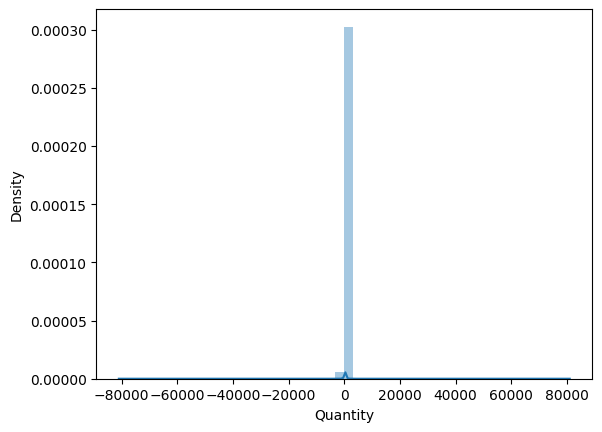

In [ ]:
# histogram
sns.distplot(df.Quantity)

<ipython-input-71-cbc4f6fd96f3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.UnitPrice)


<Axes: xlabel='UnitPrice', ylabel='Density'>

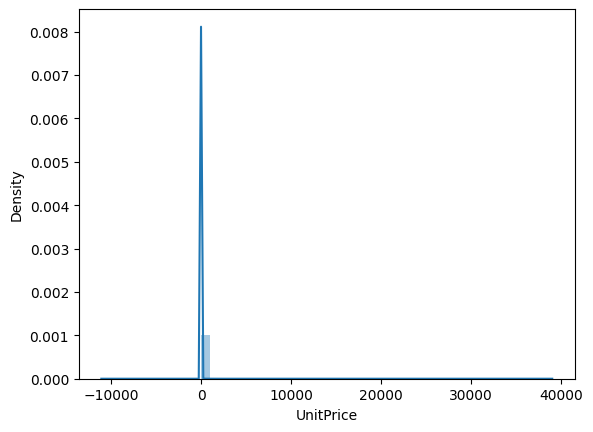

In [ ]:
# histogram
sns.distplot(df.UnitPrice)


<Axes: xlabel='InvoiceDate', ylabel='Quantity'>

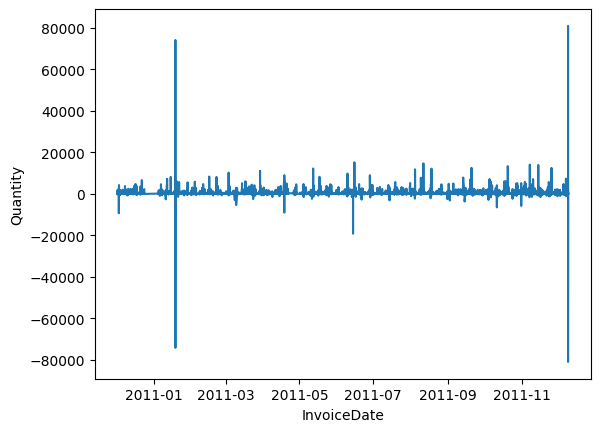

In [ ]:
# random data wrangling
data = df.groupby('InvoiceDate', as_index=False).agg({'Quantity': np.sum, 'UnitPrice': np.mean})
sns.lineplot(data=data, x="InvoiceDate", y="Quantity")


## verify data quality
----------

### task

Examine the quality of the data, addressing questions such as: is the
data complete (does it cover all the cases required)? Is it correct or
does it contain errors and if there are errors how common are they?
Are there missing values in the data? If so how are they represented,
where do they occur and how common are they?

### output

List the results of the data quality verification; if quality problems
exist, list possible solutions. Solutions to data quality problems
generally depend heavily on both data and business knowledge.

In [ ]:
# check duplicate row
df[df.duplicated(keep=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [ ]:
# check outlier
from scipy import stats
z_thr = 3.0
df[(np.abs(stats.zscore(df.select_dtypes(include=int))) > z_thr).any(axis=1)]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838.0,United Kingdom
4850,536809,84950,ASSORTED COLOUR T-LIGHT HOLDER,1824,2010-12-02 16:48:00,0.55,15299.0,United Kingdom
4945,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,2010-12-02 17:38:00,0.18,16754.0,United Kingdom
4946,536830,21915,RED HARMONICA IN BOX,1400,2010-12-02 17:38:00,1.06,16754.0,United Kingdom
6365,536890,17084R,ASSORTED INCENSE PACK,1440,2010-12-03 11:48:00,0.16,14156.0,EIRE
...,...,...,...,...,...,...,...,...
540061,581457,23543,WALL ART KEEP CALM,698,2011-12-08 18:43:00,4.15,18102.0,United Kingdom
540070,581458,22197,POPCORN HOLDER,1500,2011-12-08 18:45:00,0.72,17949.0,United Kingdom
540071,581459,22197,POPCORN HOLDER,1200,2011-12-08 18:46:00,0.72,17949.0,United Kingdom
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom


In [ ]:

# check missing data
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
# check number of unique value
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [ ]:
# check unique value
for feature in df.columns:
  print('------ ' + feature + ' ------')
  try:
    print(np.sort(df[feature].unique()))
  except:
    print(df[feature].unique())
  print()

------ InvoiceNo ------
[536365 536366 536367 ... 581585 581586 581587]

------ StockCode ------
['85123A' 71053 '84406B' ... '90214U' '47591b' 23843]

------ Description ------
['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'lost'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']

------ Quantity ------
[-80995 -74215  -9600  -9360  -9058  -5368  -4830  -3667  -3167  -3114
  -3100  -3000  -2880  -2834  -2618  -2600  -2472  -2376  -2003  -2000
  -1930  -1897  -1681  -1671  -1560  -1515  -1512  -1510  -1479  -1440
  -1430  -1400  -1350  -1300  -1296  -1284  -1277  -1206  -1200  -1158
  -1131  -1128  -1121  -1100  -1092  -1060  -1050  -1000   -990   -975
   -967   -960   -939   -905   -900   -864   -840   -828   -800   -786
   -756   -752   -750   -741   -723   -720   -701   -696   -690   -682
   -675   -674   -670   -664   -657   -635   -624   -620   -618   -600
   -590   -576   -553   -550   -541   -530   -524   -504

## note/questions
-------------

### collect initial data

- It seems that it is not possible to know exactly which InvoiceNo was cancelled.


### describe data

- InvoiceDate is converted to date type.
- CustomerID is converted to an object type.

### explore data

- There are many outliers in Quantity and UnitPrice.
- There are negative values in Quantity, UnitPrice. Negative values correspond to cancellations.

### verify data quality

- Description, CustomerID is missing. Since the reason is unknown, delete the record for now.

# **3. Data Preparation**

## select data
----------

#### select data source

The data set to be analyzed this time is `Online Retail.xlsx` provided by the UCI Machine Learning Repository.

- Note: In a real data science project, there will be a myriad of data sets. It can be difficult to find out where to look for the data you need, but organizations that manage their data well may provide data catalogs. See [here](https://www.realize-corp.jp/glossary/data-catalog) for more information on data catalogs.
- Note: In a real data science project, only data sets that have been collected and are of sufficient quality or quantity are used for analysis. Insufficient data quality can sometimes derail a data science project.

#### select attributes

We will use all of them for this analysis.

#### select records

- Remove canceled orders from the rows (Quantity, UnitPrice). (Rows with negative values for Quantity and UnitPrice are deleted.)
- Delete duplicate rows. (I don't know the reason for duplicates, but I suspect it anyway, so delete them)
- Delete rows with missing CustomerID. （Delete rows with missing CustomerID (because they cannot be used for basket analysis)

## clean data
------------------

In [ ]:
# remove unnncesary columns
columns = [] # remove no columns if array is empty
df = df.drop(columns=columns)

In [ ]:
# clean outlier

## Quantity

del_flg = df.Quantity < 0
df = df.drop(df[del_flg].index)

## UnitPrice

del_flg = df.UnitPrice < 0
df = df.drop(df[del_flg].index)

In [ ]:
# clean missing data
df = df[df.CustomerID.isnull() == False]

In [ ]:
# clean duplicate records
df = df.drop_duplicates()

## construct data
----------

In [ ]:
# derive attributes
# skip

In [ ]:
# create item master
item_master = df[['StockCode', 'Description']].drop_duplicates().sort_values('StockCode', key=lambda x: x.astype(str)).reset_index(drop=True)

In [ ]:
# show item master
item_master

,StockCode,Description
0,10002,INFLATABLE POLITICAL GLOBE
1,10080,GROOVY CACTUS INFLATABLE
2,10120,DOGGY RUBBER
3,10123C,HEARTS WRAPPING TAPE
4,10124A,SPOTS ON RED BOOKCOVER TAPE
...,...,...
3892,C2,CARRIAGE
3893,DOT,DOTCOM POSTAGE
3894,M,Manual
3895,PADS,PADS TO MATCH ALL CUSHIONS


In [ ]:
# generate records
# prep = df.groupby(['InvoiceNo', 'StockCode'])['Quantity'].sum()
prep = df.groupby(['InvoiceNo', 'Description'])['Quantity'].sum()
prep = prep.unstack().reset_index(drop=True).fillna(0)
prep = prep.apply(lambda x: x>0)

## integrate data
-------------

This task is out of scope because only a single dataset is used in this case.

- Note: In real data science projects, it is common to join many tables. This task is often performed in SQL, and the complexity of the process can exceed 1000 rows of SQL.

# format data
----------------

In this case, this task is not applicable because the data is formatted with “construct data”.

In [ ]:
# write prepared data
prep.to_csv('/content/prep.csv', encoding='utf-8', index=None)

# **4. Modeling**

## select modeling techuique
----------

Since the data mining goal of this project is to **recommend products that have a high probability of being purchased together with the product on the product page**, we will perform product recommendation using basket analysis. Specifically, we will use the mlxtend library to perform basket analysis.

In [ ]:
# import libraries
import pandas as pd
import numpy as np


In [ ]:
# read csv file
df = pd.read_csv('/content/prep.csv')

In [ ]:
# pip install
#!pip install mlxtend

## generate test design
------------------

### offline evaluation

In this project, the main offline metrics will be `support`, `confidence`, and `lift`, since we will be performing basket analysis. Therefore, we will first visualize and confirm these indicators in the offline evaluation.

### Online Evaluation

Currently, the online store has no place to recommend other products on the product page. Therefore, we will evaluate the percentage increase in sales by conducting an AB test in which users are randomly presented with "Recommend" and "Do not recommend" screens.

- Note: We will skip the online evaluation because it is not possible to conduct it in an actual online store.

## build model
----------


In [ ]:
# import libraries
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [ ]:
# parameters
min_support = 0.01
min_lift = 2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# apriori
freq_items = apriori(df, min_support=min_support, use_colnames=True)
freq_items.sort_values('support', ascending = False).reset_index(drop=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.106334,(WHITE HANGING HEART T-LIGHT HOLDER)
1,0.091929,(REGENCY CAKESTAND 3 TIER)
2,0.086319,(JUMBO BAG RED RETROSPOT)
3,0.074450,(PARTY BUNTING)
4,0.074180,(ASSORTED COLOUR BIRD ORNAMENT)
...,...,...
968,0.010035,(SET 12 KIDS WHITE CHALK STICKS)
969,0.010035,(ABC TREASURE BOOK BOX )
970,0.010035,(3 DRAWER ANTIQUE WHITE WOOD CABINET)
971,0.010035,"(POPPY'S PLAYHOUSE BEDROOM , POPPY'S PLAYHOUSE..."


### freq_items dataframe description

For more information, please refer to [this website](http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/).

| column | summary |
|:---|:---|
| support | In Japanese, it is called **support**. Percentage of the number of transactions involving itemsets (itemsets) out of the total number of transactions. The support level of item A is expressed as sup(A) or support(A). | itemsets
| itemsets | In Japanese, it is called **itemsets**. In association rules, items are often referred to as items rather than products. | itemsets


In [ ]:
# association rules
assoc_rules = association_rules(freq_items, metric="lift", min_threshold=min_lift)
assoc_rules.sort_values('lift', ascending=False).reset_index(drop=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(REGENCY TEA PLATE GREEN ),(REGENCY TEA PLATE PINK),0.014566,0.012085,0.010898,0.748148,61.909259,0.010722,3.922605,0.998390
1,(REGENCY TEA PLATE PINK),(REGENCY TEA PLATE GREEN ),0.012085,0.014566,0.010898,0.901786,61.909259,0.010722,10.033507,0.995882
2,(POPPY'S PLAYHOUSE LIVINGROOM ),"(POPPY'S PLAYHOUSE BEDROOM , POPPY'S PLAYHOUSE...",0.013595,0.013703,0.010035,0.738095,53.863517,0.009848,3.765861,0.994961
3,"(POPPY'S PLAYHOUSE BEDROOM , POPPY'S PLAYHOUSE...",(POPPY'S PLAYHOUSE LIVINGROOM ),0.013703,0.013595,0.010035,0.732283,53.863517,0.009848,3.684512,0.995070
4,(REGENCY SUGAR BOWL GREEN),(REGENCY MILK JUG PINK ),0.014458,0.014674,0.011114,0.768657,52.381694,0.010901,4.259150,0.995300
...,...,...,...,...,...,...,...,...,...,...
907,(JUMBO BAG RED RETROSPOT),(LUNCH BAG SPACEBOY DESIGN ),0.086319,0.053302,0.011707,0.135625,2.544479,0.007106,1.095240,0.664337
908,(REGENCY CAKESTAND 3 TIER),(SET OF 3 CAKE TINS PANTRY DESIGN ),0.091929,0.061826,0.011761,0.127934,2.069275,0.006077,1.075807,0.569052
909,(SET OF 3 CAKE TINS PANTRY DESIGN ),(REGENCY CAKESTAND 3 TIER),0.061826,0.091929,0.011761,0.190227,2.069275,0.006077,1.121389,0.550792
910,(WHITE HANGING HEART T-LIGHT HOLDER),(LUNCH BAG PINK POLKADOT),0.106334,0.050227,0.010682,0.100457,2.000069,0.005341,1.055839,0.559512


### assoc_rules dataframe description

For more information, please visit [this website](http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/).

The following is an example of the relationship {Diapers} -> {Beer}.

| column | overview |
|:---|:---|
| antecedents | In Japanese, it is called **conditional part**. {Diapers} becomes antecedents |
|:---|:---| | antecedents | In Japanese, it is called **conclusion part**. {Beer} becomes contexts | contingents | Japanese say **conclusion**.
| antecedents support | support for the conditional part (support for {Diapers})
consequents support | support for the conclusion (support for {Beer}) | support | support for {Diapers}
support | support for {Diapers} ∪ support for {Beer} | confidence | confidence in Japanese
| confidence | In Japanese, it is called **confidence**. The higher this value is, the more confidence the extracted rule has in the relationship that people who buy diapers also buy beer is calculated as sup({Diapers} ∪ {Beer}) / sup({Diapers}). The confidence that people who buy diapers also buy beer is expressed as confidence({Diapers} -> {Beer}). | lift
| lift | In Japanese, it is called **lift value**. It is a measure of how much more likely a diaper buyer is to also buy beer than if the diaper and beer purchase relationship were statistically independent. The lift value is calculated by confidence({Diapers} -> {Beer}) / support({Beer})
| leverage | If you want to know more details, please refer to the website.
| conviction | For more information, please refer to the website.
## assess model
-------------

In this project, the association rule was used to calculate support, conviction, and lift values. In a typical analysis project, we report the calculated support, confidence, and lift values to the person in charge of the online store, and discuss whether the calculated results are correct, whether there are any rules that could be used, and if so, how they should be expressed on the online store.

- Note: We will skip this part for the demonstration, but it is the data scientist's job to report the results to the collaborators.
- Note: Be sure to have your models and analysis results reviewed by domain experts. By having a domain expert review your models and results, you may find unexpected bugs, or get advice on how to improve your models and results.
## note/questions
-------------



# **5. Evaluation**

## evaluate result
----------

In Business Understanding's determine data mining goals, we set the success criterion as **AB testing increases sales per customer by 10% or more**. Although we are not able to conduct AB testing in this case, we will include the results of the AB test in the evaluate result section. If you want to know more about AB testing, please refer to [this book]().
## review process
------------------

In the evaluate result, the AB test only improved sales per customer by 5% (still a great result!). You need to increase sales by another 5%. Think about what you can do to improve the remaining 5% of sales.
## determine next steps
----------

During the review process, you came up with several ideas aimed at improving the remaining 5% of sales. Discuss the advantages and disadvantages of these ideas, prioritize them, and decide which ideas to implement.

- (Note: You may want to prioritize them according to the assessment situation table in the business understanding section)
## note/questions
-------------


# **6. Deployment**

## plan deployment
----------

## plan monitoring & maintenance
------------------

## produce final report
----------

# review project
-------------

## note/questions
-------------

